# Neural Networks
•	Working with neural networks
	Feed-forward network
	Functional-like neurons present in the brain
•	Learning by neural network
	The activation function returns one specific output
	X = a +b +c
	Y(x) = x+ w+ b [Weights]
	Biased: this will force the result if weights on applying don’t give the result.
	O/P Layer: Classify the results among the produced outputs through a neural network and return the output with the highest probability.
•	Structure of NN:
	Input layer: The number of neurons should be equal to the number of features in each sample.
	Hidden layer: There is no limit to the hidden layers. There can be as many as many hidden layers under a neural layer. The more the layer slower the output will be.
	Output Layer (No. of unique labels): It must be equal to labels.

In [1]:
!pip install keras
!pip install matplotlib

In [6]:
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")


Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(Xtrain, ytrain), (Xtest, ytest) = keras.datasets.mnist.load_data()
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

# data scaling
Xtrain = Xtrain/Xtrain.max()
Xtest = Xtest/Xtest.max()

print(len(np.unique(ytrain)))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
10


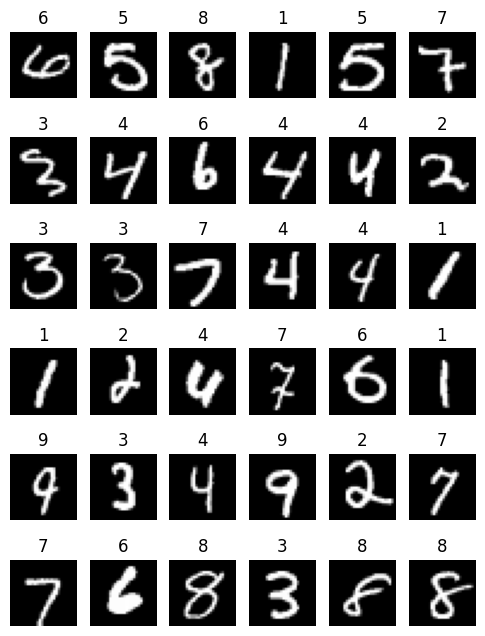

In [ ]:
plt.figure(1,(6,8))
for i in range(1,37,1):
  temp = np.random.randint(0,60000)
  im = Xtrain[temp]
  lab = ytrain[temp]
  plt.subplot(6,6,i)
  plt.imshow(im,cmap = 'gray')
  plt.axis('off')
  plt.title(lab)


In [4]:
#Creating the Neural Networks.
nn_model=keras.Sequential(); #Create the empty 'nn' feed forward.
#Framework.
nn_model.add(keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])))  #An , Input Layer.

#Hidden Layers.
nn_model.add(keras.layers.Dense(2048,activation='relu')); # Hidden Layer - 1.
nn_model.add(keras.layers.Dense(2048,activation='relu')); # Hidden Layer - 2.
nn_model.add(keras.layers.Dense(2048,activation='relu')); # Hidden Layer - 3.

#Output Layer.
nn_model.add(keras.layers.Dense(len(np.unique(ytrain))))

print(nn_model.summary())

#Optimizer Adding.
nn_model.compile(optimizer='SGD',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy']) # Changed 'Loss' to 'loss'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 2048)              1607680   
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_3 (Dense)             (None, 10)                20490     
                                                                 
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print(nn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 2048)              1607680   
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_3 (Dense)             (None, 10)                20490     
                                                                 
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version: ", tf.__version__)

# Check if TensorFlow is built with CUDA (GPU) support
print("Is TensorFlow built with CUDA: ", tf.test.is_built_with_cuda())

# Check if GPU device is available
# Use tf.config.list_physical_devices('GPU') instead of tf.test.is_gpu_available()
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

# List physical devices visible to TensorFlow
print("Physical devices: ", tf.config.list_physical_devices())


TensorFlow version:  2.10.1
Is TensorFlow built with CUDA:  True
GPU is available
Physical devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
#TRrain the model for the Xtrain and Ytrain.
history=nn_model.fit(Xtrain,ytrain,epochs=60)

Epoch 1/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0741 - accuracy: 0.9794
Epoch 2/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0637 - accuracy: 0.9820
Epoch 3/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0552 - accuracy: 0.9849
Epoch 4/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0484 - accuracy: 0.9870
Epoch 5/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0421 - accuracy: 0.9888
Epoch 6/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0370 - accuracy: 0.9905
Epoch 7/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0323 - accuracy: 0.9921
Epoch 8/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9931
Epoch 9/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0246 - accuracy: 0.9943
Epoch 10/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.021

Text(0, 0.5, 'Accuracy')

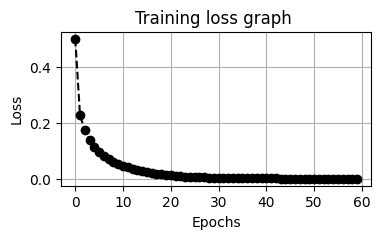

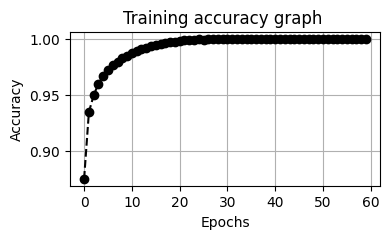

In [ ]:
# visualize the training loss and acc
plt.figure(1,(4,2))

plt.plot(history.epoch,history.history['loss'],'--ko')
plt.grid('on')
plt.title('Training loss graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure(2,(4,2))
plt.plot(history.epoch,history.history['accuracy'],'--ko')
plt.grid('on')
plt.title('Training accuracy graph ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
[loss,acc] = nn_model.evaluate(Xtest,ytest)
print('Loss:',loss)
print('Accuracy:',acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0660 - accuracy: 0.9793
Loss: 0.0659627914428711
Accuracy: 0.9793000221252441


# MNSIT FANSHION DATA SET

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(Xtrain, ytrain), (Xtest, ytest) = keras.datasets.fashion_mnist.load_data()
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

# data scaling
Xtrain = Xtrain/Xtrain.max()
Xtest = Xtest/Xtest.max()

print(len(np.unique(ytrain)))

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
10


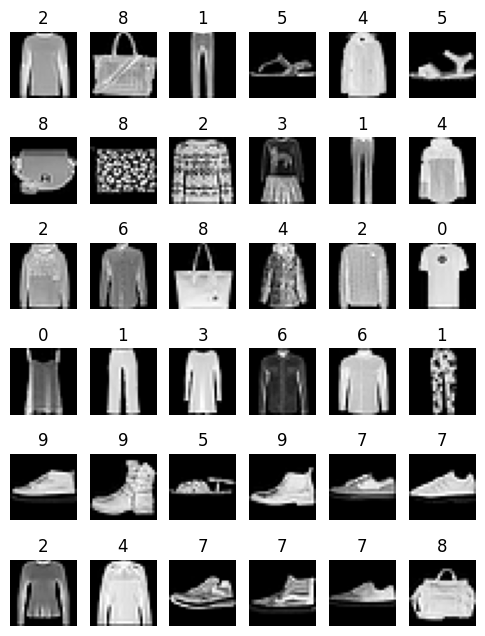

In [ ]:
plt.figure(1,(6,8))
for i in range(1,37,1):
  temp = np.random.randint(0,60000)
  im = Xtrain[temp]
  lab = ytrain[temp]
  plt.subplot(6,6,i)
  plt.imshow(im,cmap = 'gray')
  plt.axis('off')
  plt.title(lab)


In [ ]:
#Creating the Neural Networks.
nn_model=keras.Sequential(); #Create the empty 'nn' feed forward.
#Framework.
nn_model.add(keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])))  #An , Input Layer.

#Hidden Layers.
nn_model.add(keras.layers.Dense(2048,activation='relu')); # Hidden Layer - 1.
nn_model.add(keras.layers.Dense(2048,activation='relu')); # Hidden Layer - 2.
nn_model.add(keras.layers.Dense(2048,activation='relu')); # Hidden Layer - 3.

#Output Layer.
nn_model.add(keras.layers.Dense(len(np.unique(ytrain))))

print(nn_model.summary())

#Optimizer Adding.
nn_model.compile(optimizer='SGD',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy']) # Changed 'Loss' to 'loss'

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 2048)              1607680   
                                                                 
 dense_9 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_10 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_11 (Dense)            (None, 10)                20490     
                                                                 
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print(nn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 2048)              1607680   
                                                                 
 dense_9 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_10 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_11 (Dense)            (None, 10)                20490     
                                                                 
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#TRrain the model for the Xtrain and Ytrain.
history=nn_model.fit(Xtrain,ytrain,epochs=40)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6489 - accuracy: 0.7868
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4438 - accuracy: 0.8446
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3992 - accuracy: 0.8592
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3706 - accuracy: 0.8684
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3482 - accuracy: 0.8761
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3314 - accuracy: 0.8819
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3163 - accuracy: 0.8858
Epoch 8/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3033 - accuracy: 0.8903
Epoch 9/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2916 - accuracy: 0.8949
Epoch 10/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.280

Text(0, 0.5, 'Accuracy')

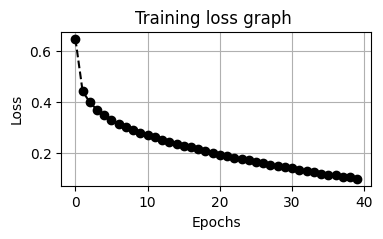

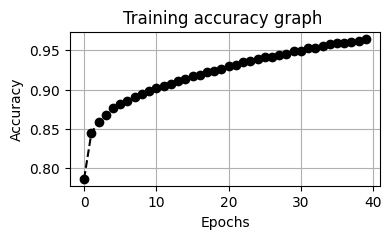

In [ ]:
# visualize the training loss and acc
plt.figure(1,(4,2))

plt.plot(history.epoch,history.history['loss'],'--ko')
plt.grid('on')
plt.title('Training loss graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure(2,(4,2))
plt.plot(history.epoch,history.history['accuracy'],'--ko')
plt.grid('on')
plt.title('Training accuracy graph ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
[loss,acc] = nn_model.evaluate(Xtest,ytest)
print('Loss:',loss)
print('Accuracy:',acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3392 - accuracy: 0.8866
Loss: 0.3392421007156372
Accuracy: 0.8866000175476074


# CIFAR 10 small images classification dataset

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(Xtrain, ytrain), (Xtest, ytest) = keras.datasets.cifar10.load_data()
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

# data scaling
Xtrain = Xtrain/Xtrain.max()
Xtest = Xtest/Xtest.max()

print(len(np.unique(ytrain)))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
10


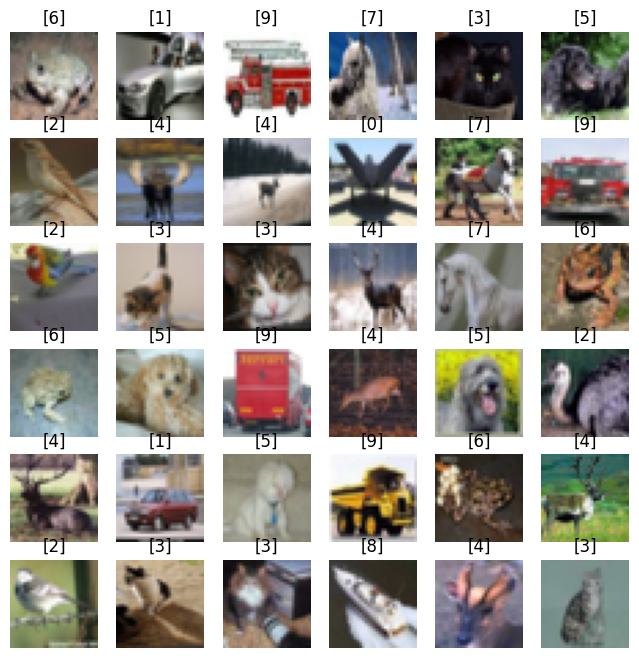

In [3]:
plt.figure(1,(8,8))
for i in range(1,37,1):
  temp = np.random.randint(0,50000)
  im = Xtrain[temp]
  lab = ytrain[temp]
  plt.subplot(6,6,i)
  plt.imshow(im)
  plt.axis('off')
  plt.title(lab)

In [4]:
#Creating the Neural Networks.
nn_model=keras.Sequential(); #Create the empty 'nn' feed forward.
#Framework.
nn_model.add(keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2],Xtrain.shape[3])))  #An , Input Layer.

#Hidden Layers.
nn_model.add(keras.layers.Dense(5046,activation='relu')); # Hidden Layer - 1.
nn_model.add(keras.layers.Dense(5046,activation='relu')); # Hidden Layer - 2.
nn_model.add(keras.layers.Dense(5046,activation='relu')); # Hidden Layer - 3.

#Output Layer.
nn_model.add(keras.layers.Dense(len(np.unique(ytrain))))

print(nn_model.summary())

#Optimizer Adding.
nn_model.compile(optimizer='SGD',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy']) # Changed 'Loss' to 'loss'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 5046)              15506358  
                                                                 
 dense_1 (Dense)             (None, 5046)              25467162  
                                                                 
 dense_2 (Dense)             (None, 5046)              25467162  
                                                                 
 dense_3 (Dense)             (None, 10)                50470     
                                                                 
Total params: 66,491,152
Trainable params: 66,491,152
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
#TRrain the model for the Xtrain and Ytrain.
history=nn_model.fit(Xtrain,ytrain,epochs=50)

KeyboardInterrupt: 

In [ ]:
# visualize the training loss and acc
plt.figure(1,(4,4))

plt.plot(history.epoch,history.history['loss'],'--ko')
plt.grid('on')
plt.title('Training loss graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure(2,(4,2))
plt.plot(history.epoch,history.history['accuracy'],'--ko')
plt.grid('on')
plt.title('Training accuracy graph ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
[loss,acc] = nn_model.evaluate(Xtest,ytest)
print('Loss:',loss)
print('Accuracy:',acc)

313/313 [==============================] - 1s 3ms/step - loss: 3.0166 - accuracy: 0.5892
Loss: 3.016559600830078
Accuracy: 0.5892000198364258
